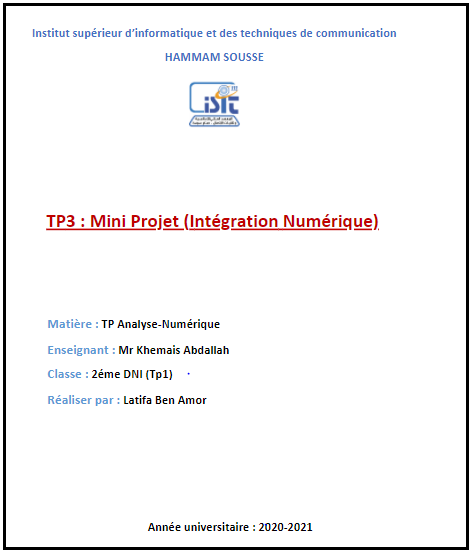

<h3>
<span style="color: #2980B9 "> I. Partie théorique :   </span>
    </h3>

<h3>
<span style="color: orange "> L'intégration numérique :   </span>
    </h3>
 
 Si f est une fonction continue sur un intervalle [a,b], bien souvent on ne sait pas calculer une primitive de f. Ainsi, si  l'on désire obtenir la valeur de 

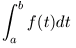

il faut parfois se contenter d'obtenir une valeur approchée à l'aide d'une méthode d'intégration numérique.

La plupart des méthodes d'intégration numérique fonctionnent sur le même principe. On commence par couper le gros intervalle [a,b] en N plus petits intervalles [ai,ai+1], avec a1=a et aN+1=b. Puis, pour chaque intervalle [ai,ai+1], on essaie d'approcher

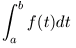

 <h4>Les moyens les plus simples sont :</h4>
   <h3><span style="color:red ">- Méthode des rectangles à gauche : </span></h3>
   
   la formule composite des rectangles est donnée comme suit :
       
   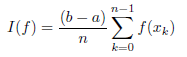


Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés en vert :
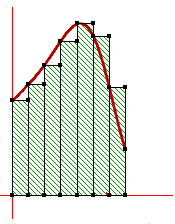

<h4> L'erreur de la méthode des rectangle à gauche :</h4>

On montre facilement, que l'erreur est plus précisément inférieure à :
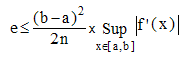

   <h3><span style="color:red ">- Méthode du point milieu : </span></h3>
   
   la formule composite des points milieu est donnée comme suit :
   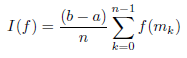

Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés en bleu :
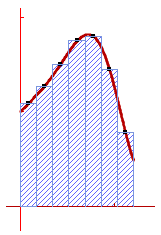

<h4> L'erreur de la méthode des points milieu :</h4>

On admet que si f est de classe C2 alors l’erreur commise par la méthode du point milieu est majorée par l’inégalité
suivante :

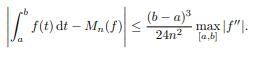

   <h3><span style="color:red ">- Méthode des trapèzes : </span></h3>
   
   la formule composite des trapèzes est donnée comme suit :
   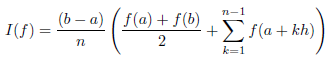

Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des trapèzes hachurés en marron :
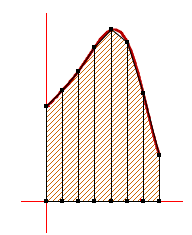

<h4> L'erreur de la méthode des trapézes :</h4>

comme contrôle de l’erreur, on a
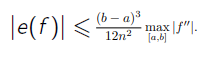

   <h3><span style="color:red ">- Méthode de simpson : </span></h3>
   
   La méthode de Simpson consiste en l'approximation suivante :
  
  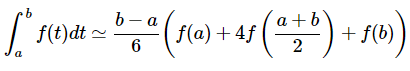
  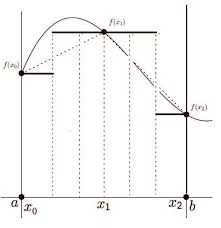
  
  Cette formule est exacte pour tous les polynômes de degré inférieur ou égal à 3 : on dit que la méthode de Simpson est d'ordre 3.

En général, pour appliquer cette méthode d'intégration, on découpe l'intervalle [a,b] en n intervalles de longueur (b−a)/n, et on applique la formule précédente sur chacun des sous-intervalles. On a alors, en posant h=b−a/n :

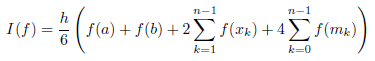

<h4> L'erreur de simpson:</h4>

Lorsque f est de classe C4, on peut estimer l'erreur commise. En notant M4=sup[a,b]*|f|, on a

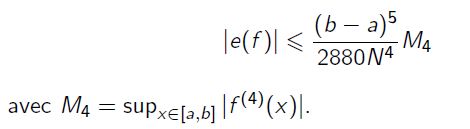

<h3>
<span style="color: #2980B9 "> I. Partie pratique :   </span>
    </h3>

<h4>Problème :</h4>

On considère les 4 fonctions classiques suivantes :
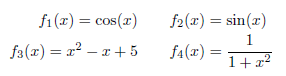

==>Le but de ce Projet est de comparer les 4 méthode d’intégrations numériques.

In [255]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *
%matplotlib widget
import ipywidgets as widgets

<h3> Méthode des rectangle à gauche :</h3>

In [256]:
class RectangleG (object) :
    def __init__ ( self,a,b,n,f ) :
        self.a = a
        self.b = b
        self.x = np . linspace ( a ,  b ,  n+1)
        self.f = f
        self.n = n
    def integrate ( self,f):
        x= self.x
        y=f(x)
        h =float(x[1]-x[0])
        s =sum( y[0 :-1])
        return h*s
    def Graph (self,f,resolution =1001):
        xl =self.x
        yl = f(xl)
        xlist_fine =np . linspace (self.a ,self.b ,resolution)
        for i in  range( self.n) :
            x_rect = [ xl[i], xl[i], xl[i+1], xl[i+1], xl[i]]
            y_rect = [0,yl[i], yl[i], 0, 0]
            plt.plot ( x_rect, y_rect ,"r")
        yflist_fine=f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)
        plt.plot(xl,yl,"bo-")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Methode des rectangles gauches')
        plt.text(0.5*(self.a + self.b), f(self.b) ,'I_{}= {:0.8f}'.format(self.n,(self.integrate(f)), fontsize =15))
    

<h4> <span style="color:indigo ">Remarque (Les caractéristiques de la méthode ) : </span> </h4>

=> On remplace f par la fonction en escalier qui prend, sur chaque segment de la subdivision, la meme valeur à l'extrémiter gauche de ce segment que f. Cela revient donc à interpolerla fonction f sur le segment [Xi, Xi+1] par le polynome de Lagrange de degré 0 qui vaut f(Xi)

=> Le lecteur intéressé par le calcul de cette majoration pourra se reporter au calcul similaire de l'évaluation de l'erreur commise par la méthode des trapèzes. Cette dernière, en 1/n2, est plus efficace : à précision égale, 100 points de subdivision équivalent, grosso modo à 10 000 points par la méthode des rectangles. Mais cela est très théorique. Tout dépend de la fonction et de l'amplitude de l'intervalle d'intégration. Sans oublier les erreurs d'arrondis.

<h4> <span style="color:indigo ">Calcul d'erreur théoriquement : </span> </h4>
on a :

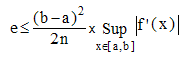

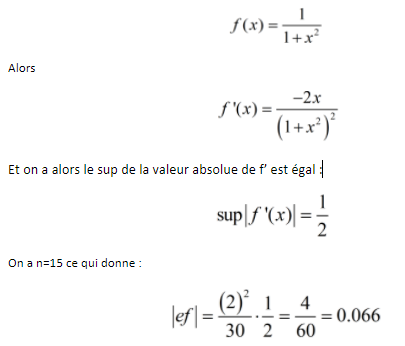

<h4> <span style="color:red ">=> donc l'erreur de la méthode des rectangle à gauche va étre inférieur au égal à 0.066 </span> </h4>

<h3> Méthode des points milieu :</h3>

In [257]:
class pointsMilieux( object ) :
    def __init__(self, a, b, n, f):#initialiser les paramètres du classe
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x# contiens les xi
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)
        
        for i in range(self.n):
            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] # ordonnees des sommets
            plot(x_rect, y_rect,"g")
            yflist_fine = f(xlist_fine)
            plt.plot(xlist_fine, yflist_fine)
            plt.plot(m,f(m),"r*")
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.title('Méthode du point milieu')
            plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

<h4> <span style="color:indigo ">Remarque (Les caractéristiques de la méthode ) : </span> </h4>

- La méthode du point milieu nécessite deux calculs des dérivées (fonction f) à chaque pas de temps. C'est deux fois plus que la méthode d'Euler, mais ces calculs supplémentaires sont largement compensés par le fait que la méthode est d'ordre 2, c'est-à-dire que l'erreur évolue comme h2 lorsque le pas de temps est assez petit

<h4> <span style="color:indigo ">Calcul d'erreur théoriquement : </span> </h4>

on a :

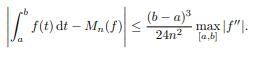

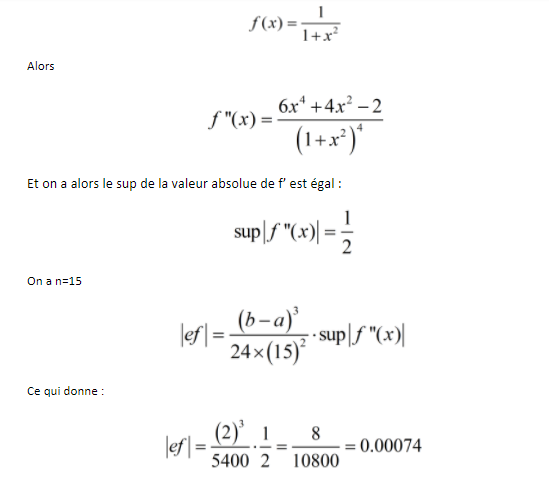

<h4> <span style="color:red ">=> donc l'erreur de la méthode des points milieux va étre inférieur au égal à 0.00074 </span> </h4>
<h4> <span style="color:red ">=>L'erreur est deux plus petite que celle donnée par la méthode des rectangles à gauche</span> </h4>
<h4> <span style="color:red ">=>L'erreur est deux fois plus petite que celle donnée par la méthode des trapèzes.</span> </h4>

<h3> Méthode des trapéze :</h3>

In [258]:
class Trapezoidal (object) :
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel('f(x)')
        plt.title('Méthode des Trapézes')
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
            

<h4> <span style="color:indigo ">Remarque (Les caractéristiques de la méthode ) : </span> </h4>

- La méthode des trapèzes est la première des formules de Newton-Cotes, avec deux nœuds par intervalle. Sa rapidité de mise en œuvre en fait une méthode très employée.
- la méthode des trapézes est plus précise que la méthode élémentaire, dite des rectangles, correspondant aux sommes de Cauchy-Riemann, consistant à remplacer la fonction initiale par une approximation en escalier.
- A subdivision égale, cette méthode apparaît a priori comme plus précise que celle des rectangles, principalement pour une fonction à variation rapide (dérivée forte).

<h4> <span style="color:indigo ">Calcul d'erreur théoriquement : </span> </h4>

on a :
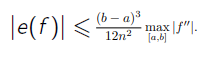

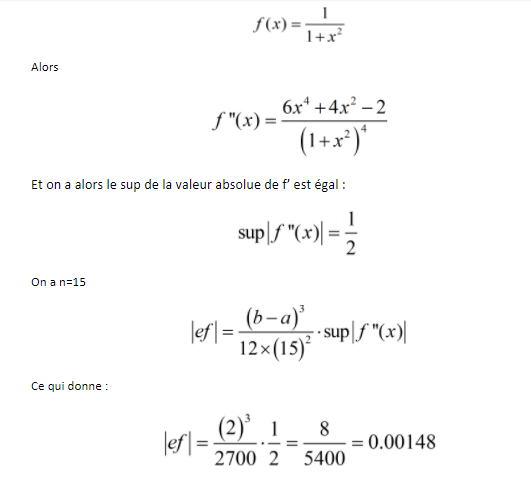

<h4> <span style="color:red ">=> donc l'erreur de la méthode des trapézes va étre inférieur au égal à 0.00148 </span> </h4>
<h4> <span style="color:red ">=>L'erreur est deux fois plus grande que celle donnée par la méthode des points milieux.</span> </h4>


<h3> Méthode de simpson :</h3>

In [259]:
class Simpson (object) :
    def __init__ ( self ,a, b,n, f ) :
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
    def integrate ( self, f) :
        x=self.x
        y=f(x)
        h=float(x[1] - x[0])
        n =len(x)-1
        s = y[0] + y[-1] + 4.0*sum(y[1:-1])
        return h * s / 4.0
    def Graph ( self,f, resolution=1001) :
        xl=self.x
        yl= f(xl)
        xlist_fine=np.linspace(self.a , self.b,resolution)
        for i in range (self.n) :
            xx = np.linspace(xl[i] ,xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            a= xl[i]
            b= xl[i+1]
            l0=(xx-m)/(a-m)*(xx-b )/(a-b)
            l1=(xx-a)/(m-a )*(xx-b)/(m-b)
            l2=(xx-a )/(b-a)*(xx-m)/(b-m)
            P= f(a)*l0+f(m)*l1+f(b)*l2
            plt.plot(xx,P,"r")
        yflist_fine=f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine,"b")
        plt.plot(xl,yl,"ro")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Methode de simpson')
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
                

<h4> <span style="color:indigo ">Remarque (Les caractéristiques de la méthode ) : </span> </h4>

- La méthode de Simpson consiste à remplacer la fonction ff sur chaque intervalle par une fonction qui sera un trinôme. En effet, nous allons l’approcher par un polynôme de degré 2 qui passe pas les points Mi[Xi, f(Xi))], Mi+1[Xi+1, f(Xi+1)] et par le point au milieu
- La courbe de la fonction f est quasiment confondue avec celui obtenue 

<h4>==> En fait, il existe un unique polynôme de degré 2 qui vérifie les conditions.</h4>

<h4> <span style="color:indigo ">Calcul d'erreur théoriquement : </span> </h4>

on a :
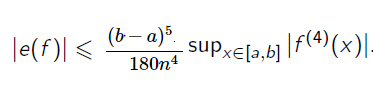

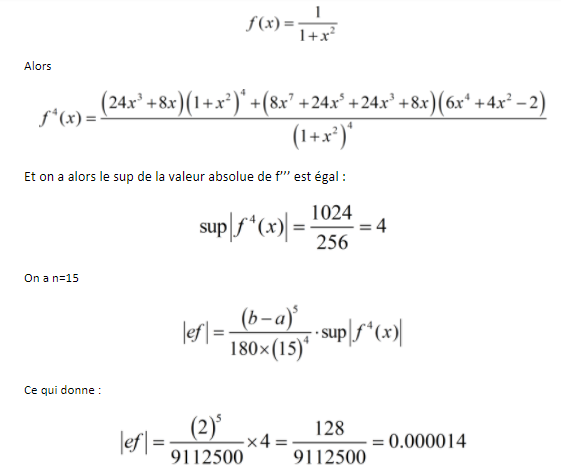

<h4> <span style="color:red ">=> donc l'erreur de la méthode de simpson va étre inférieur au égal à 0.000014 </span> </h4>
<h4> <span style="color:red ">=> on peut estimer le plus petit erreur par la méthode de simpson on comparant par la méthode des trapèzes ou celle des rectangles. </span> </h4>


<h3> Fonction Sim pour faire appel aux trois méthodes:</h3>

- création d'une fontion qui fait appel à tout les classes

In [260]:
def sim(a,b,n,f):
    Trap = Trapezoidal(a, b, n, f)
    Simp = Simpson(a, b, n, f)
    Rect = RectangleG(a, b, n, f)
    Pm = pointsMilieux(a,b,n,f)

    #fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(221) 
    grid()
    Trap.Graph(f) 

    ax = fig.add_subplot(222)
    grid()
    Simp.Graph(f)

    ax = fig.add_subplot(223)
    grid()
    Rect.Graph(f)

    ax = fig.add_subplot(224)
    Pm.Graph(f)
    grid()

    plt.show()

In [261]:
output = widgets.Output() 
with output:
    fig= plt.figure(figsize=(5,6))

fig.canvas.toolbar_position = 'bottom' 

In [262]:
int_slider = widgets.IntSlider(value=1, min=1, max=50, step=1, description='N')
color_picker = widgets.ColorPicker(value="blue", description='color')
text_a= widgets.IntText(value=-1, description='a', continuous_update=False)
text_b = widgets.IntText(value=1, description='b', continuous_update=False)
select = widgets.Dropdown(options={'1/(1+x**2)':lambda x:1/(1+x**2),
                                    'sin(x)':lambda x: sin(x),
                                    'cos(x)':lambda x:cos(x),
                                    'x**2-x+5':lambda x:x**2-x+5},description='fonction f') 
button = widgets.Button(description="Simulation")

# callback functions
def update(change):
    """redraw line (update plot)"""
    fig.clear() 
    sim(text_a.value,text_b.value,int_slider.value,select.value)
   
def line_color(change):
    """set line color"""
    fig.clear()
    sim(text_a.value,text_b.value,int_slider.value,select.value)

def on_button_clicked(b):
    with output:
        fig.clear()
        sim(text_a.value,text_b.value,int_slider.value,select.value)

int_slider.observe(update, 'value')
color_picker.observe(line_color, 'value')

In [263]:
controls = widgets.VBox([int_slider, color_picker,text_a, text_b,select,button])
button.on_click(on_button_clicked)
widgets.HBox([controls, output])

<h3> <span style="color:red ">Conclusion :</span></h3>

- Toutes les méthodes précédentes consistent à interpoler la fonction par un polynôme, puis à remplacer le calcul de l'intégrale de celle-ci par l'intégrale du polynôme d'interpolation.
- Pour les méthodes des rectangles, on interpole la fonction en un seul point avec un polynôme constant (à gauche, milieu ou droite de l'intervalle); la méthode des trapèzes utilise l'interpolation de la fontion par un polynôme du premier degré ( $ P(x)=ax+b$ ) aux deux extrémités de l'intervalle; enfin, la méthode de Simpson utilise un polynôme d'interpolation de degré 2.

<h4>==> on peut conclure que la méthode de Simpson est la méthode la plus précis. elle nous permet d'obtenir la plus proche estimation

==> On peut construire ainsi des méthodes d'intégration numérique d'ordre quelconque, en augmentant le degré du polynôme d'interpolation. Il s'agit plus généralement des méthodes de Newton-Cotes.</h4>

<h3><span style="color:red ">Enregistrement de la simulation sous forme de vidéo :</span> </h3>

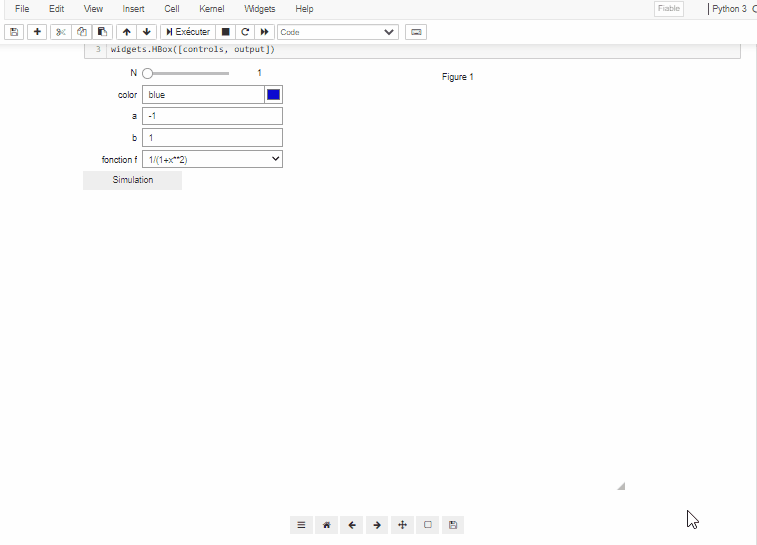